# LS Treshold Grid Search

In this notebook, we aim to evaluate the impact of the LS threshold over the latent space throughout our training proceedure.

In [6]:
import sys
import pickle
import importlib

sys.path.append('..')
#from utils import data_handler
from src.utils import data_handler
from src import config
from src.utils import visualisation, benchmark, helpers, monitoring
from src.models import torch_CVAE, torch_CVAE_1


# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# pytorch specific
import torch
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm




from matplotlib.animation import FuncAnimation
from IPython.display import HTML

pd.options.display.width = 1000
DEVICE = torch.device(config["DEVICE"])

In [7]:
EPOCH = 10
latent_dim = 64
thresholds = [0.0017, 0.0020, 0.0023, 0.0026, 0.0029]
thresholds = [0, 0.0017, 0.0020, 0.0023, 0.0026, 0.0029]
histories = []
print(len(thresholds))

6


loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0 ...
removing 0 genes under the LS threshold from the dataset
number of genes selected :  10277
matching :  10277
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 10277)
number of seq in the dataset : 1231
(1231, 10277)
(1231, 1, 10277)
train data: 1231
10277


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
 90%|█████████ | 9/10 [02:10<00:14, 14.76s/it]

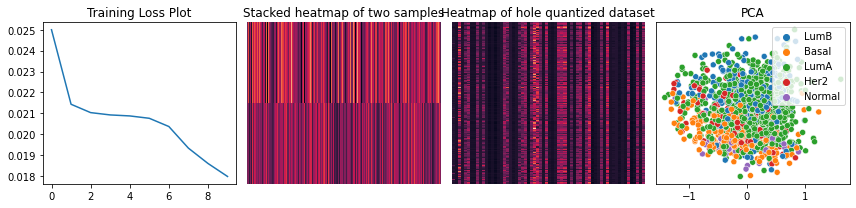

100%|██████████| 10/10 [02:26<00:00, 14.65s/it]


Total parameters: 107821278
Trainable parameters: 107821278
loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0017 ...
removing 1142 genes under the LS threshold from the dataset
number of genes selected :  9135
matching :  9135
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 9135)
number of seq in the dataset : 1231
(1231, 9135)
(1231, 1, 9135)
train data: 1231
9135


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
 90%|█████████ | 9/10 [03:12<00:19, 19.61s/it]

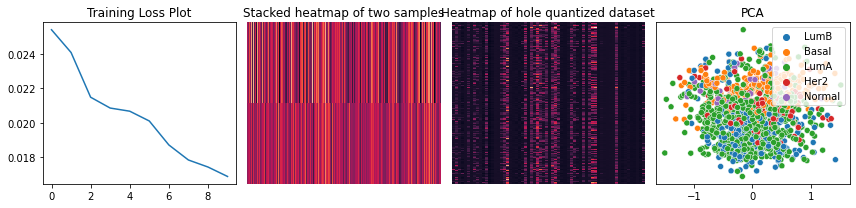

100%|██████████| 10/10 [04:25<00:00, 26.54s/it]


Total parameters: 85930454
Trainable parameters: 85930454
loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.002 ...
removing 7035 genes under the LS threshold from the dataset
number of genes selected :  3242
matching :  3242
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 3242)
number of seq in the dataset : 1231
(1231, 3242)
(1231, 1, 3242)
train data: 1231
3242


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
 90%|█████████ | 9/10 [00:37<00:03,  3.63s/it]

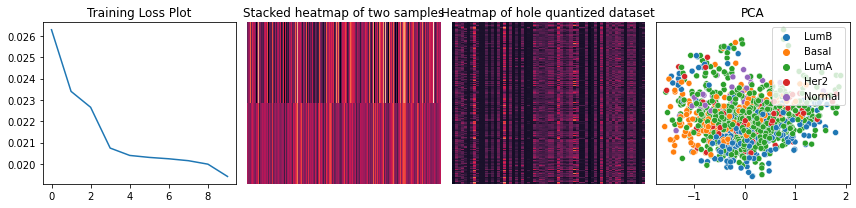

100%|██████████| 10/10 [00:42<00:00,  4.27s/it]


Total parameters: 11283578
Trainable parameters: 11283578
loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0023 ...
removing 8849 genes under the LS threshold from the dataset
number of genes selected :  1428
matching :  1428
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 1428)
number of seq in the dataset : 1231


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


(1231, 1428)
(1231, 1, 1428)
train data: 1231
1428


 90%|█████████ | 9/10 [00:09<00:00,  1.19it/s]

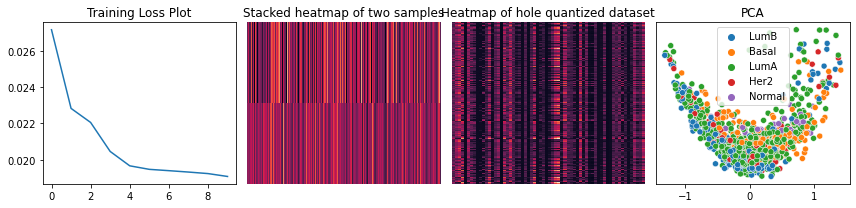

100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


Total parameters: 2493746
Trainable parameters: 2493746
loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0026 ...
removing 9423 genes under the LS threshold from the dataset
number of genes selected :  854
matching :  854
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 854)
number of seq in the dataset : 1231
(1231, 854)
(1231, 1, 854)
train data: 1231
854

/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


 90%|█████████ | 9/10 [00:09<00:00,  1.26it/s]

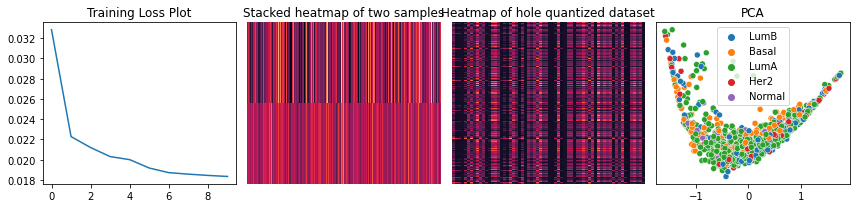

100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


Total parameters: 1056522
Trainable parameters: 1056522
loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0029 ...
removing 9696 genes under the LS threshold from the dataset
number of genes selected :  581
matching :  581
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 581)
number of seq in the dataset : 1231
(1231, 581)
(1231, 1, 581)
train data: 1231
581


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
 90%|█████████ | 9/10 [00:13<00:00,  1.11it/s]

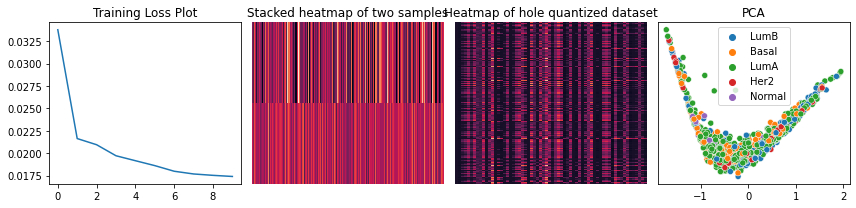

100%|██████████| 10/10 [00:16<00:00,  1.68s/it]

Total parameters: 620062
Trainable parameters: 620062


In [8]:
for t in thresholds:
    data, metadata = data_handler.generate_dataset_BRCA(LS_threshold= t, MAD_threshold = 1, MT_removal= True, expression_threshold= 0.1)
    
    data_set, dataloader = helpers.format_dataset(data, metadata, 0.01)

    feature_num = len(metadata["feature_names"])
    print(feature_num)
    
    importlib.reload(torch_CVAE)

    model = torch_CVAE.Autoencoder(
        shape = feature_num,
        dropout = 0.2,
        latent_dim = latent_dim,
        is_variational = False,
        use_convolution= True,
        )

    model.add_attention()

    optimizer = optim.Adam(model.parameters(), lr=1e-4, amsgrad=False)

    model.to(DEVICE)

    monitor = monitoring.Monitor(model, dataloader, label = metadata["subtypes"])
    
    callbacks = monitor.callbacks

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', min_lr= 1e-5)
    model.train()

    for epoch in tqdm(range(EPOCH)):
        running_loss = 0.0
        count = 0
        
        # Training loop
        for _, inputs in enumerate(dataloader):
            optimizer.zero_grad()
            inputs = inputs.to(DEVICE)
            # Compute the VAE loss or standard loss
            if model.is_variational:
                outputs, mu, log_var = model(inputs)
                reconstruction_loss = F.mse_loss(outputs, inputs)
                kld = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
                loss = reconstruction_loss + (1 * kld)
            else:
                outputs = model(inputs)
                loss = F.mse_loss(outputs, inputs)
            
            loss.backward()
            optimizer.step()
            count += 1
            running_loss += loss.item()
        
        # Calculate and store training loss for this epoch
        train_loss = running_loss / count
        monitor.append_loss(train_loss)
        callbacks(epoch)
    
    n_trainable_param, n_total_param, = benchmark.count_parameters(model)
    # stores the treshold value for this experiment.
    monitor.threshold = t 
    monitor.n_total_param = n_total_param
    histories.append(monitor)
    



INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


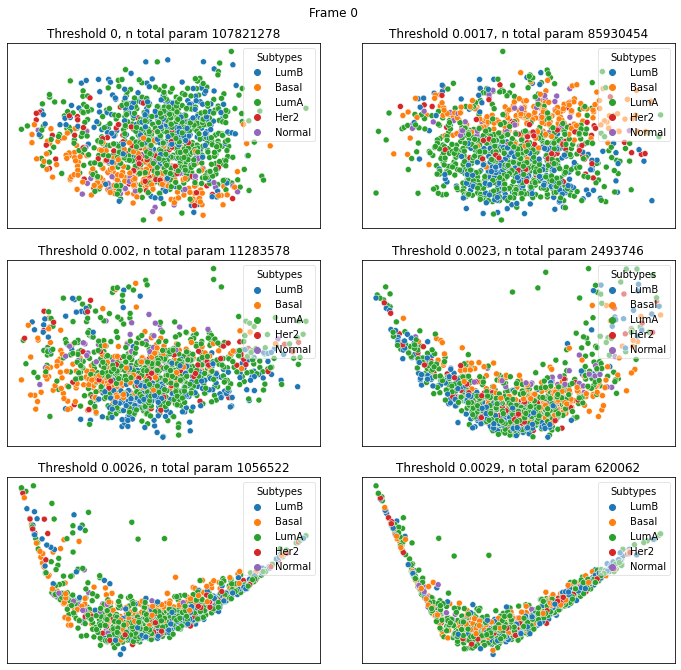

In [12]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))  # you can adjust the size as you see fit

# Flatten the array of axes, for easier iteration
axs_flat = axs.flatten()

# This function updates all subplots for a given frame
def update(frame):
    for i, (monitor, ax) in enumerate(zip(histories, axs_flat)):
        ax.clear()  # Clear the previous scatter plot
        ax.set_title(f'Threshold {monitor.threshold}, n total param {monitor.n_total_param}')

        # Get the PCA result for the current frame from current monitor
        pca_result = monitor.frames[frame]

        # Scatter plot of PCA results with color based on subtype
        scatter = sns.scatterplot(x=pca_result[:, 1], y=pca_result[:, 2], hue=metadata["subtypes"], ax=ax)  # plotting on the current axes

        # Adjusting the legend
        legend = ax.legend(loc='upper right', title='Subtypes', framealpha = 0.5)  # you can specify the location here
        ax.set_xticks([])
        ax.set_yticks([])

    # You can set a main title for all subplots here, if you want
    plt.suptitle(f'Frame {frame}')

# Create the animation object
ani = FuncAnimation(fig, update, frames=len(histories[0].frames), repeat=True)  # assuming all monitors have the same number of frames

# Adjust layout and padding for better visuals
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the padding; you might need to tweak these values

# Display the animation
HTML(ani.to_jshtml())
